In [ ]:
import get_data
import generate_signals
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 60
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(25, 7)
import seaborn as sns
import itertools
import datetime

In [2]:
period=[8,16,32,24,48,96]

In [3]:
G10_daily = get_data.currency()
print(G10_daily.get_all_symbols())
G10_daily_category=['DEXUSAL','DEXCAUS','DEXSZUS','DEXUSUK','DEXJPUS',\
                    'DEXNOUS','DEXUSNZ','DEXSDUS']
data_dict=G10_daily.get_currency(G10_daily_category)

Try to get your own key, though you can use my key:)

['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS']
The currency you are downloading are ['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS']


In [4]:
for i in range(len(G10_daily_category)):
    index=G10_daily_category[i]
    data_dict[index].value.fillna(method='pad',inplace=True)
    #del duplicate data
    dup=data_dict[index].duplicated('date')
    data_dict[index]=data_dict[index][~dup]
    #use USD as basic currency
    if i in [0,3,5,8]:
        data_dict[index].value=1/data_dict[index].value

#if date is all the same
for j,k in itertools.combinations(range(len(G10_daily_category)),2):
    if(sum(data_dict[G10_daily_category[j]].date!=\
              data_dict[G10_daily_category[k]].date)>0):
        print('Dates of dataset '+G10_daily_category[j]+' and '+\
              G10_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [5]:
signal_class=generate_signals.signal_1(data_dict,period)

In [6]:
signal_class.get_signal()

In [7]:
signal_df=signal_class.signal_df

In [8]:
price_df=pd.DataFrame()
for index in G10_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

0.0393005371035 0.533996275946 0.0430328062819


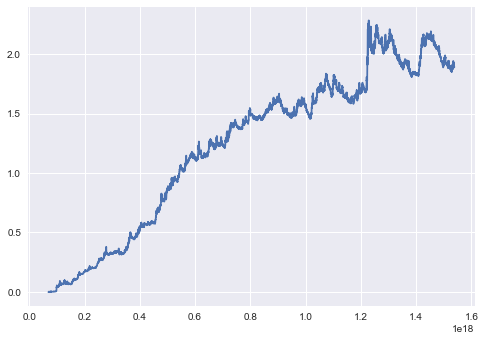

In [9]:
#TS
position=signal_df/8    
#weight=price_df.apply(lambda x:x/np.sum(x),axis=1)
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1
plt.plot(daily_cum_re)
aunual_re=daily_cum_re[-1]/len(daily_cum_re.index)*252
aunnual_std=np.std(daily_re)*np.sqrt(252)
aunnual_sp=np.mean(daily_re)/np.std(daily_re)*np.sqrt(252)
print(aunual_re,aunnual_sp,aunnual_std)

In [ ]:
#CS    
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1
plt.plot(daily_cum_re)
aunual_re=daily_cum_re[-1]/len(daily_cum_re.index)*252
aunnual_std=np.std(daily_re)*np.sqrt(252)
aunnual_sp=np.mean(daily_re)/np.std(daily_re)*np.sqrt(252)
print(aunual_re,aunnual_sp,aunnual_std)

In [46]:
plt.plot_date(data=daily_cum_re.index,daily_cum_re)

SyntaxError: positional argument follows keyword argument (<ipython-input-46-30228b5e1cb9>, line 1)

In [52]:
daily_cum_re[daily_cum_re.idxmax(axis=1)]-

0.1438567545360796

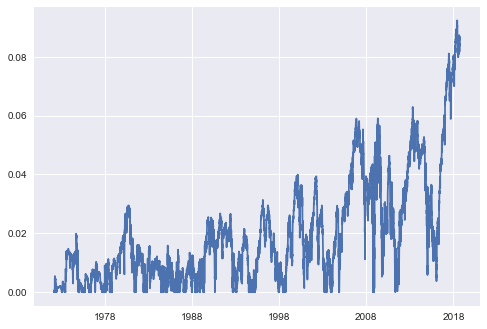

In [58]:
plt.plot(np.maximum.accumulate(daily_cum_re)-daily_cum_re)

In [10]:
import result_ana

In [11]:
x=result_ana.result_daily(daily_re)

NameError: name 'cum_re' is not defined

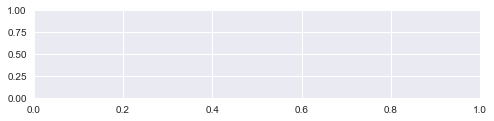

In [12]:
x.figure_plot()

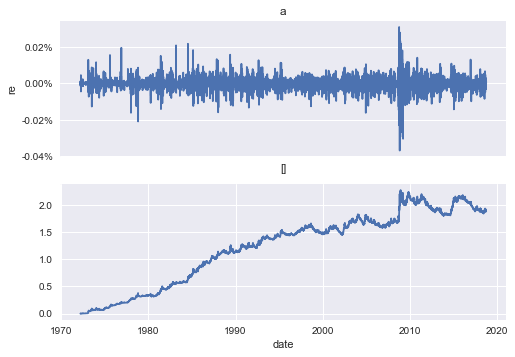

In [17]:
ax1=plt.subplot(211,title='a')
daily_re.plot(ax=ax1)
ax1.set(xlabel=[],ylabel='re',xticks=[])
ax1.yaxis.set_major_formatter(yticks)
ax2=plt.subplot(212)
daily_cum_re.plot(label='b')

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

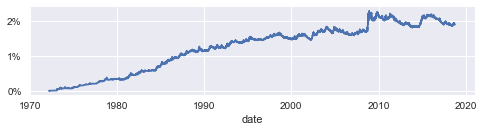

In [27]:
ax1=plt.subplot(311)
daily_cum_re.plot(ax=ax1)
fmt='%.f%%'
ax1.yaxis.set_major_formatter(FormatStrFormatter(fmt))

In [22]:
from matplotlib.ticker import FuncFormatter
fmt='%.2f%%'
yticks = FormatStrFormatter(fmt)

NameError: name 'FormatStrFormatter' is not defined

AttributeError: Unknown property subtitle

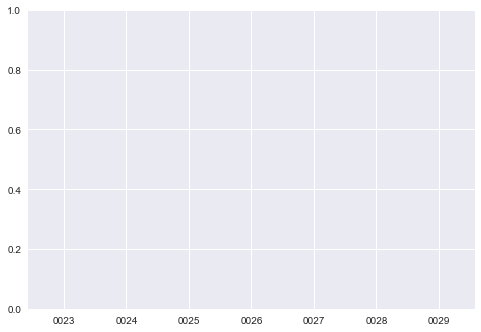

In [20]:
daily_cum_re.plot(subtitle='a')

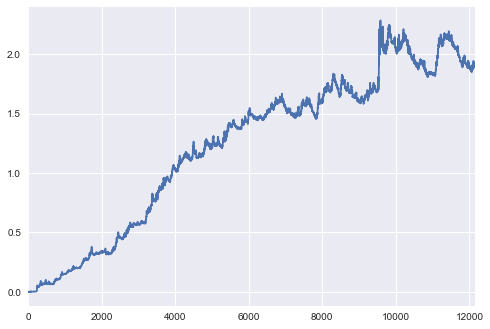

In [31]:
sns.tsplot(daily_cum_re,)

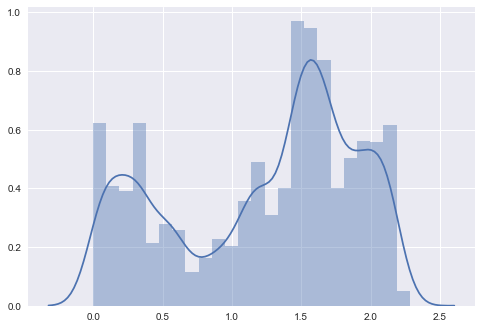

In [34]:
sns.distplot(daily_cum_re)

In [36]:
date=daily_cum_re.index

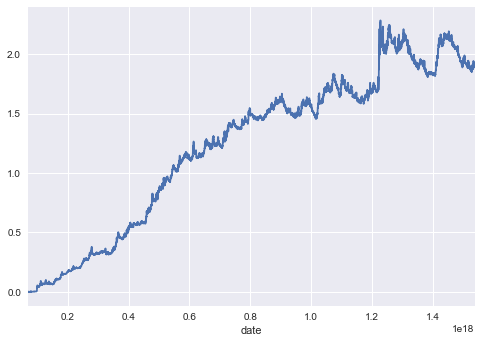

In [38]:
sns.tsplot(daily_cum_re,date)

In [39]:
import matplotlib.dates as mdates

In [42]:
fig, ax1 = plt.subplots()
sns.tsplot(daily_cum_re, time=daily_cum_re.index,ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

OverflowError: Python int too large to convert to C long

OverflowError: Python int too large to convert to C long